<center><font size = "10"> Week 8 - Synapses <center>
<center><font size = "8">Home work - Solutions<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 7
<br>Group member1: Joe Tharayil
<br>Group member2: Kiyarash Farivar

## Ex1. Plot the dependence of the NMDA conductance on the Mg2+ concentration.

<font sie='3'>Create a single compartmental soma neuron to host the synpase modeled in SimpleAMPA_NMDA.mod file. Using the stimulation pattern and the values for the synaptic conductances used in tutorial 01, plot the NMDA conductance at different [Mg2+] values (0.0, 0.1, 0.25, 0.5) mM.
    
<font sie='3'>Explain what happens to the NMDA conductance and why, in your opinion, does this happen. [1 pt]

The plot shows a marked increase in g_NMDA as [Mg2+] decreases, indicating the NMDA receptor requires the presence of Mg2+ for the voltage block to be effective.

In [11]:
!nrnivmodl

/home/in_silico/InSilicoClass/my_notebooks/week8
SimpleAMPA_NMDA.mod TsodyksMarkram_AMPA_NMDA.mod vecevent.mod
SimpleAMPA_NMDA.mod TsodyksMarkram_AMPA_NMDA.mod vecevent.mod
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  SimpleAMPA_NMDA.lo TsodyksMarkram_AMPA_NMDA.lo vecevent.lo mod_func.lo  -L"/usr/local/nrn/x86_64/lib" -lnrnoc -loc -lmemacs  -lscopmath -lsparse13 -lreadline -lncurses -ltinfo -L"/usr/local/nrn/x86_64/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link: rm -fr  .libs/libnrnmech.la .libs/libnrnmech.lai .libs/libn

In [12]:
import neuron
from neuron import h
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load external files & initialize
h.load_file("stdrun.hoc");
h.stdinit();

In [13]:
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert('pas')

__nrnsec_0x2a60bb0

In [14]:
# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1

In [15]:
synapse = h.SimpleAMPA_NMDA(soma(0.5))

In [16]:
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[0] = 1.0        # In units of [nS] due to the gmax scaling factor in our .mod file

In [25]:
g_syn = h.Vector()
g_syn.record(synapse._ref_g)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)
time = h.Vector()
time.record(neuron.h._ref_t)

Vector[17]

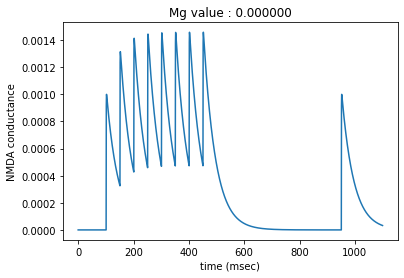

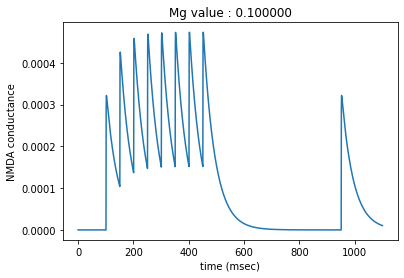

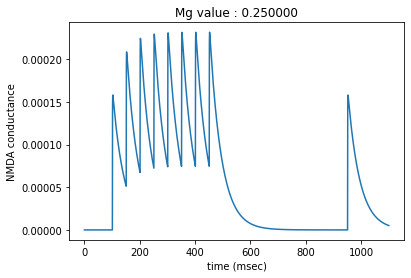

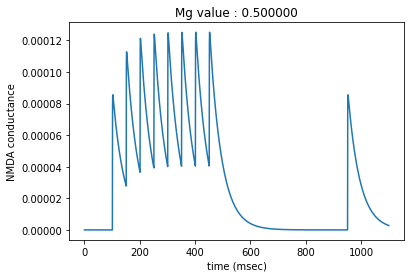

In [37]:
mg_concents = [0, 0.1, 0.25, 0.5]
for concent in mg_concents:
    h.tstop = 1100.0 # ms
    synapse.gmax_NMDA = 0.001 # uS
    synapse.mg = concent # mM
    synapse.gmax_AMPA = 0 # uS
    h.run()

    # plot
    plt.figure()
    plt.title('Mg value : %f'%concent)
    plt.xlabel('time (msec)')
    plt.ylabel('NMDA conductance')
    plt.plot(time, g_syn)
    plt.show()

### Answer:
the mg blocks the NMDA at more negative potentials. so since our cell starts at a negative potential the more mg we have the more NMDA receprots are blocked, so the less conductance we get.

## Ex2. Configure a facilitating synapse (E1)

<font size='3'> Create a single compartmental soma neuron, add to it passive properties, add to the center of the neuron a synapse with the mechanism modeled in TsodyksMarkram_AMPA_NMDA.mod file, inject a stimulation pattern and define the conductances for NMDA and AMPA receptors, as it was done in tutorial 02. 

<font size='3'>Find the values for U1, tau_rec and tau_facil that would make the synapse behave as a facilitating synapse and plot the R, Use and conductance curves.
    
<font size='3'>Define U1, tau_rec and tau_facil. Would you be able to define any relation between these variables depending on the synapse type? If yes, please explain. [1.5 pts]    

In [38]:
# make soma
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert('pas')

# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1

# make synapse
synapse = h.TsodyksMarkram_AMPA_NMDA(soma(0.5)) 

# make stimulie
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[0] = 1.0        # In units of [nS] due to the gmax scaling factor in our .mod file

In [39]:
g_syn = h.Vector()
g_syn.record(synapse._ref_g)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)
time = h.Vector()
time.record(neuron.h._ref_t)
R_syn = h.Vector()
R_syn.record(synapse._ref_R)
Use_syn = h.Vector()
Use_syn.record(synapse._ref_Use)

Vector[24]

In [40]:
synapse.gmax_AMPA = 0.002 # uS
synapse.gmax_NMDA = 0.7 * 0.002 # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance
synapse.mg = 1.0 # mM

In [91]:
synapse.U1 = 0.1 # Baseline release probability
synapse.tau_rec = 100 # ms - recovery from depression
synapse.tau_facil = 2000 # ms - relaxation from facilitation

h.tstop = 1000.0 # ms
neuron.h.run()

0.0

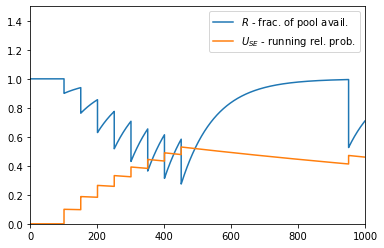

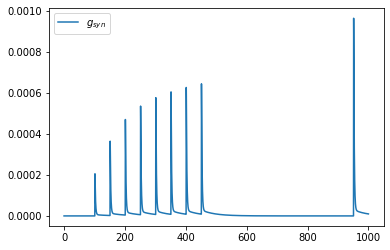

In [92]:
plt.figure()
plt.plot(time, R_syn, label='$R$ - frac. of pool avail.')
plt.plot(time, Use_syn, label='$U_{SE}$ - running rel. prob.')
plt.legend()
plt.axis([0,1000,0,1.5])

plt.figure()
plt.plot(time, g_syn, label="$g_{syn}$")
plt.legend()

## Answer:
**U1:** is the release probability of vesicles. This is the probability of release for vesicles that have been docked. The smaller the current values of U1 the bigger the jump that happens when an AP arrives. This is because U1 is tightly connected to Ca concentration in the cell.

**tau_facil:** is the time it takes for the U1 to go back to 0. This is simulating the dissipation of Ca (and other processes that decrease Ca concentration) in the cell.

**tau_rec:** is the time for a vesicle to transform from inactive (not docked) to become docked to the memebrane (added to the RRP(readily releasable pool)).

E1 synapses: we need a baseline_U1 to be low and the tau_facil to be bigger than tau_rec and tau_rec should be small. In this way the cell starts with small concentration of Ca inside. U1 increases with each AP and it takes a long time to lower the Ca levels this helps maintain a high release probability. Since tau_rec is fast we don't run out of vesicels so for each AP facilitation happens.

E2 synapse: we need a big value for tau_rec and a smal value for tau_facil and baseline_U1 should be much higher now (around 0.5). This way for each AP (and specially for the first AP) the synapse looses many of its vesicels and the Ca concentration goes back to it's low level very fast causing depression. (low value of RRP and low level of Ca)

E3 synapse: we need the tau_facil and tau_rec to be almost equal and the baseline_U1 start at a moderatly low value (0.2/0.3). this way we first get a facilictation followed by depression since at first both the release probability and the RRP increase which makes the consequtive APs bigger but then the RRP is depleated and we get depression. But if we wait for the RRP to refill but not to long so U1 wouldn't have decreased too much we can get a facillitation. 




# Ex 3. Compute Coefficient of Variation (CV) of the EPSP amplitudes

<font size='3'>Compute the CV of the excitatory postsynaptic potential (EPSP) amplitudes of your three connections that you can find in your group folder (.h5 files). Plot the CV profile of your connections as well as the mean CV profile with mean and std as it was plotted in the paper show in the lecture [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928). The result plot should have four curves, one per each connection and the mean. [2 pts]

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def jackknife(traces):
    
    meanList = []
    
    for i, trace in enumerate(traces):

        sampleMean = (np.sum(traces,axis=0)-trace)/(len(traces)-1)
        meanList.append(sampleMean)
        
    return meanList

In [3]:
def compute_amplitude(mean_trace, STIM_TIMES, t_wind_bef, t_wind_aft):
    """
    This function compute the amplitudes of the EPSPs in mean_trace
    :param mean_trace: deconvelved voltage data 1D-array (list)
    :param STIM_TIMES: times where a stimulus is performed
    :param t_wind_bef: time window before the stimulus
    :param t_wind_aft: time window after the stimulus 
    :return amplitudes: list with amplitude values
    """
    amplitudes = []
    max_list = []
    min_list = []
    for t in STIM_TIMES:
        mx = np.max(mean_trace[(t-t_wind_bef):(t + t_wind_aft)])
        mn = np.min(mean_trace[(t-t_wind_bef):(t + t_wind_aft)])
        amp = np.abs(mx - mn) 
        max_list.append(mx*1000.0) # multiply by 1000.0 to convert values to mV
        min_list.append(mn*1000.0)
        amplitudes.append(amp*1000.0)
    return amplitudes

In [49]:
data_list = ['1','31','83']
data_array = []

for datum in data_list:
    
    connection_array = []
    data = h5py.File('connection_c'+datum+'.h5', 'r')
    
    for v in data.keys():
        dat = data.get(v)
        dat = np.array(dat)
        connection_array.append(dat)
        
    denoised_traces = jackknife(connection_array)
    data_array.append(denoised_traces)


In [4]:
STIM_TIMES = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000]
t_wind_aft = 300
t_wind_bef = 50
time = np.arange(0,1.3,0.0001)

In [72]:
CVlist = np.zeros([len(data_array)+1,len(STIM_TIMES)])

for i, dataset in enumerate(data_array):
    
    amplitudes = np.zeros([len(dataset),len(STIM_TIMES)])
    CVs = np.zeros(len(STIM_TIMES))
    
    for j, trace in enumerate(dataset):
        amps = compute_amplitude(trace, STIM_TIMES, t_wind_bef, t_wind_aft)
        amplitudes[j,:] = amps
        
    CVs = np.std(amplitudes,axis=0)/np.mean(amplitudes,axis=0)
    CVlist[i,:] = CVs

CVlist[-1,:] = np.mean(CVlist[:i,:],axis=0)        

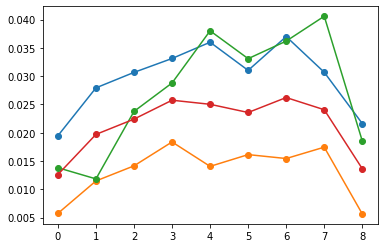

In [73]:
plt.figure()
for CVs in CVlist:
    plt.plot(CVs,'o-')
plt.show()

# Ex 4. Compute failure rate

<font size='3'>Compute the failure rate of the EPSPs from the connections of your group folder. The failure rate is the fraction of trials from which no PSP is generated above certain threshold. You can find a way of computing the failure rate in [Feldmeyer et al., 1999](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2269646/). Represent the mean result of the three connections in a bar plot. [1.5 pts]

In [10]:
def getNoiseAmp(trace):
    A2 = np.arange(100,105)
    B2 = np.arange(107,110)
    V_A2 = np.mean(trace[A2])
    V_B2 = np.mean(trace[B2])
    noise = V_B2-V_A2
    return noise

In [125]:
def amp_rise_lat_firstEPSP(sample_connection, STIM_TIMES, time, t_wind_bef, t_wind_aft, PLOT = False):
    """
    This function selects the rise curve (first EPSP) and find the  5, 20 and 80 % of the amplitude.
    Firstly computes the amplitude as the difference minimum - maximum in the interval (first_stimulus, max_peak).
    Secondly computes the percentages and find the times for these respective values.
    Tau_rise = 80%_time - 20%_time (Feldmeyer et al., 1999)
    latency = 5%_time - first_stimulus
    :param sample_connection: array with voltage traces oriented (voltage vs trials)(row vs column)
    :param STIM_TIMES: list with the stimuli points
    :param time: list with time steps in s
    :param t_wind_aft: time window after the stim time to compute max and min
    :param t_wind_bef: time window before the stim time to compute max and min
    :return amp_value: amplitude of the first EPSP computed as the difference between the 20 and the 80 % of rise
    :return TAU_rise: list with tau_rise values in ms. Computed as the distance between the times when
    the 20 and 80 % of the rise part for the first EPSP happens
    :return latency: list with latency values in ms. Computed as the time between the AP of the presynaptic cell
    and the 5% of the first EPSP
    """
    # The analysis are performed over the mean trace
    conn = np.mean(sample_connection, axis=0)

    # save only the trace part for the first peak for voltage and time
    rise_curve = conn[STIM_TIMES[0] - t_wind_bef:STIM_TIMES[0] + t_wind_aft]
    rise_curve_time = time[STIM_TIMES[0] - t_wind_bef:STIM_TIMES[0] + t_wind_aft]

    # find max, min and compute amplitude
    max_value = np.max(rise_curve)
    min_value = np.min(rise_curve)
    amp_value_total = np.abs(max_value - min_value)

    # compute percentages
    twenty_peak_value = amp_value_total * 80.0 / 100.0
    eighty_peak_value = amp_value_total * 20.0 / 100.0
    five_peak_value = amp_value_total * 95.0 / 100.0
    amp_value = eighty_peak_value - twenty_peak_value

    # Find the exact voltage point
    twenty_curve_value = -(twenty_peak_value - max_value)
    eighty_curve_value = -(eighty_peak_value - max_value)
    five_curve_value = -(five_peak_value - max_value)

    # Find time point for the minimum
    for x, s in zip(rise_curve, rise_curve_time):
        if (x == min_value):
            min_time = s

    # Find time points for the 5, 20 and 80 % of the first EPSP
    n = 0
    m = 0
    l = 0
    for i, j in zip(rise_curve, rise_curve_time):

        if (n == 0) and (i > twenty_curve_value) and (j > min_time):
            twenty_time = j
            n = 1
        if (m == 0) and (i > eighty_curve_value) and (j > min_time):
            eighty_time = j
            m = 1
        if (l == 0) and (i > five_curve_value) and (j > min_time):
            five_time = j
            l = 1
    
    latency = np.Inf
    
    if PLOT == True:
        plt.figure()
        plt.plot(rise_curve_time, rise_curve, label='first EPSP')
        #plt.plot(twenty_time, twenty_curve_value, 'ro', label='20%')
        #plt.plot(eighty_time, eighty_curve_value, 'mo', label='80%')
        #plt.plot(five_time, five_curve_value, 'go', label='5%')
        #plt.legend()
        plt.show()
    
    try:
        pre_AP = time[STIM_TIMES[0]]
        TAU_rise = np.abs((twenty_time-eighty_time))
        latency = np.abs((five_time)-pre_AP)
    except:
        pass
    
    return latency

In [126]:
STIM_TIMES = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000]
t_wind_aft = 200
t_wind_bef = 50
time = np.arange(0,1.3,0.0001)

In [133]:
data_list = ['1','31','83']

meanFailures = []

for datum in data_list:
    
    failureList  = []
    
    data = h5py.File('connection_c'+datum+'.h5', 'r')
    
    for v in data.keys():
        dat = data.get(v)
        dat = np.array(dat)
        
        noise = getNoiseAmp(dat)
        
        amps = compute_amplitude(dat, STIM_TIMES, t_wind_bef, t_wind_aft)
        failuresAmp = np.where(amps<1.5*noise)

        
        latency = np.zeros(len(STIM_TIMES))
        for i,stim in enumerate(STIM_TIMES):
            trace = np.zeros([len(dat),1])
            trace[stim-t_wind_bef:stim+t_wind_aft,0] = dat[stim-t_wind_bef:stim+t_wind_aft]
            latency[i] = amp_rise_lat_firstEPSP(trace.T, [stim], np.arange(0,len(trace)), t_wind_bef, t_wind_aft)

        failuresInf = np.where(latency==np.Inf)
        
        latency[np.where(latency==np.Inf)] = np.nan
        
        failuresLat = np.where(latency > 2.5*np.nanmean(latency))
                                                
        failures = np.union1d(np.union1d(failuresAmp, failuresLat),failuresInf)
                                                
        failureList.append(len(failures)/i)
                                                
    meanFailures.append(np.mean(np.array(failureList)))
                                                
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater


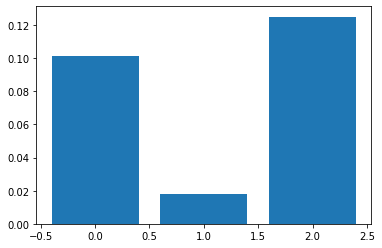

In [136]:
plt.figure()
plt.bar(np.arange(0,3),meanFailures)
plt.show()